In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.CipherBreaker import CipherBreaker
from src.CipherUtils import (
    TextDecoder,
    TextEncoder,
    CipherGenerator,
    TextPreProcessor,
)
from src.ProbabilityMatrix import ProbabilityMatrix
from src.evaluation import (
    accuracy_varying_text_length,
    prepare_subtexts,
    plot_accuracy_by_length,
)

In [2]:
# Initialize classes and obtain the matrix of probabilities by training on the provided text
cipher_generator = CipherGenerator()
preprocess = TextPreProcessor()
text_encoder = TextEncoder()
text_decoder = TextDecoder()


# List of text file paths to build our corpus (where we learn the transitions probs)
file_paths = [
    "texts/moby_dick.txt",
    "texts/shakespeare.txt",
    "texts/james-joyce-a-portrait-of-the-artist-as-a-young-man.txt",
    "texts/james-joyce-dubliners.txt",
    "texts/james-joyce-ulysses.txt",
]

texts = []
for file_path in file_paths:
    with open(file_path, "r") as file:
        texts.append(file.read())

corpus = "".join(texts)


# preprocess the text, removing extra-characters

corpus = preprocess.lower(corpus)
unknown_chars = preprocess.unknown_chars(corpus)
# print(unknown_chars)
corpus = preprocess.remove_unknown_chars(corpus, unknown_chars=unknown_chars)
corpus = preprocess.remove_additional_spaces(corpus)

preprocess.save_text(
    corpus
)  # save text after preprocessing inside text_preprocessed.txt


# compute the transition probs
probability_matrix = ProbabilityMatrix(corpus)
probability_matrix.compute_probability_table()

In [4]:
# lengths = [10, 25, 50, 100, 250, 500, 1000]
lengths = [(20 + 5 * i) for i in range(15)]
n_iterations = 3
max_iterations = 100000
nstart = 3
# Use it on the Moby Dick text
subtexts = prepare_subtexts("texts/moby_dick.txt", lengths)
Moby_Dick_accuracy = accuracy_varying_text_length(
    subtexts,
    cipher_generator,
    probability_matrix,
    max_iterations=max_iterations,
    n_iterations=n_iterations,
    nstart=nstart,
)


# Use it on the article text
subtexts = prepare_subtexts("texts/article_tipping.txt", lengths)
article_tipping_accuracy = accuracy_varying_text_length(
    subtexts,
    cipher_generator,
    probability_matrix,
    max_iterations=max_iterations,
    n_iterations=n_iterations,
    nstart=nstart,
)

# Use it on the war message text
subtexts = prepare_subtexts("texts/eisenhower_speech.txt", lengths)
speech_accuracy = accuracy_varying_text_length(
    subtexts,
    cipher_generator,
    probability_matrix,
    max_iterations=max_iterations,
    n_iterations=n_iterations,
    nstart=nstart,
)

Iter 0 of start 1: imotxnz wrrhbvlf ioww hn bfmhonw frhn knozf olr vnunz hbvc mrs wrvl tznibfnwk moubvl wbxxwn rz vr hrvnk bv hk
Iter 0 of start 2: oxwiypm leersfnc owll rp scxrwpl cerp jpwmc wne fpapm rsfb xeq lefn imposcplj xwasfn lsyylp em fe refpj sf rj
Iter 0 of start 3: edhisnz vmmpgyut ehvv pn gtdphnv tmpn rnhzt hum ynonz pgyb dml vmyu iznegtnvr dhogyu vgssvn mz ym pmynr gy pr
['whabler toominds watt me ishmaet some years ado never ming hof tond brewisety havind tillte or no money in my', 'whabler toominds watt me ishmaet some years ado never ming hou tond brewisety havind tillte or no money in my', 'whauler toominds watt me ishmaet some years ado never ming hof tond urewisety havind tillte or no money in my', 'whaucer lootinds wall te ishtael sote years ado nemer ting hof lond urewisely hamind liccle or no toney in ty', 'whapler toominds watt me ishmaet some years ado never ming hof tond prewisety havind tillte or no money in my']
Iter 0 of start 1: dinvgls zeefctuk dnzz fl cki

In [5]:
print("Moby Dick accuracy", Moby_Dick_accuracy)
print("Article accuracy", article_tipping_accuracy)
print("Eisenhower speech accuracy", speech_accuracy)

Moby Dick accuracy [0.7481481481481481, 0.9316239316239315, 0.9407407407407408, 0.9872611464968153, 0.8959537572254335, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9916926272066459, 0.996135265700483, 0.9946808510638298, 0.9983700081499592]
Article accuracy [0.6458333333333334, 0.7304347826086955, 0.8333333333333334, 0.929936305732484, 0.6971428571428572, 0.9384615384615383, 0.43478260869565216, 0.03879310344827586, 0.08695652173913043, 0.6752136752136751, 1.0, 1.0, 1.0, 1.0, 1.0]
Eisenhower speech accuracy [0.9404761904761904, 0.7884057971014493, 0.7122302158273381, 0.7309236947791163, 0.8010471204188482, 0.9907407407407408, 0.9276595744680852, 0.9921259842519685, 0.9964028776978417, 0.9966101694915256, 0.9968253968253968, 0.9971346704871061, 0.9972826086956522, 1.0, 1.0]


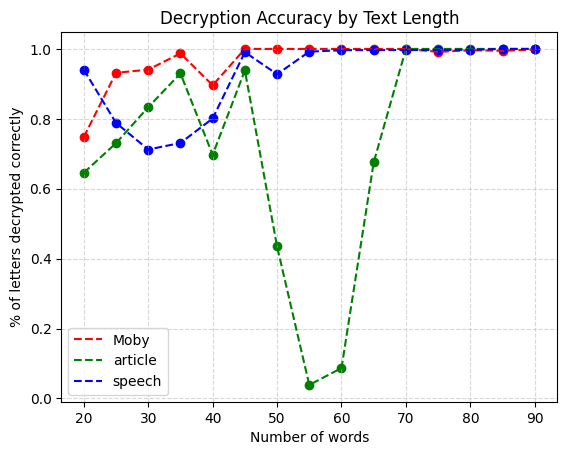

In [6]:
plot_accuracy_by_length(
    lengths=lengths,
    accuracy_data=[Moby_Dick_accuracy, article_tipping_accuracy, speech_accuracy],
    titles=["Moby", "article", "speech"],
)

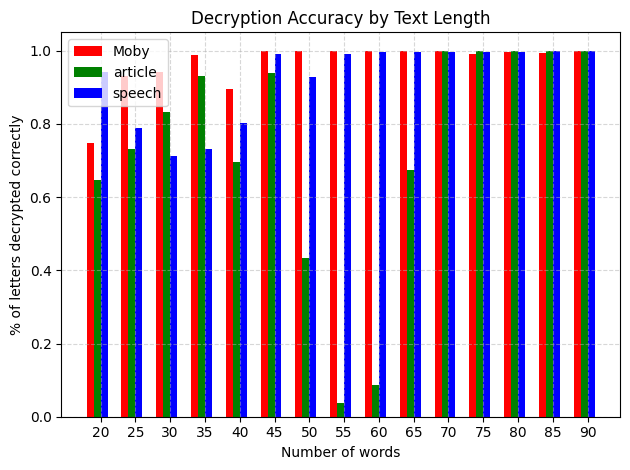

In [7]:
from src.evaluation import barplot

barplot(
    lengths=lengths,
    accuracy_data=[Moby_Dick_accuracy, article_tipping_accuracy, speech_accuracy],
    titles=["Moby", "article", "speech"],
)